# Diabetes Diagnosis Based on Patient Health Metrics

##### Diabetes Dataset:

| **Feature**    | **Description**                                                                 |
|----------------|---------------------------------------------------------------------------------|
| **Visit_ID**   | Visit or session identifier for each patient’s medical record                    |
| **Patient_ID** | Unique identifier for each patient                                              |
| **Gender**     | F (Female) & M (Male)                                                           |
| **AGE**        | Age of the patient                                                              |
| **Urea**       | Urea levels in the blood                                                        |
| **Cr**         | Creatinine ratio                                                                |
| **HbA1c**      | Hemoglobin A1c levels                                                            |
| **Chol**       | Cholesterol levels                                                               |
| **TG**         | Triglycerides levels                                                             |
| **HDL**        | High-density lipoprotein cholesterol                                             |
| **LDL**        | Low-density lipoprotein cholesterol                                              |
| **VLDL**       | Very low-density lipoprotein                                                     |
| **BMI**        | Body mass index                                                                  |

<br/>

**Target** **`CLASS`**:
- **N**: No diabetes
- **P**: Pre-diabetes
- **Y**: Yes (Patient has Diabetes)

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/diabetes.csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1006 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [3]:
df.sort_values(by='ID')

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
844,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
540,2,44835,M,60.0,2.1,56.0,7.6,3.3,1.7,0.9,1.7,0.8,36.6,Y
845,2,44835,M,60.0,2.1,56.0,7.2,6.3,3.7,1.0,3.7,1.7,28.0,Y
846,3,41248,M,53.0,4.2,55.0,8.0,5.0,2.5,1.3,2.3,1.6,30.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,796,34514,M,51.0,3.7,58.0,9.0,6.2,1.5,1.6,1.7,1.5,35.0,Y
716,797,34515,M,56.0,4.2,70.0,6.9,4.2,2.6,1.8,4.0,1.5,31.0,Y
478,798,34516,M,60.0,2.7,35.0,9.0,4.4,2.0,0.6,3.0,0.9,27.0,Y
48,799,34517,F,44.0,3.0,39.0,5.5,9.5,1.7,1.3,2.5,0.6,21.0,N


## Exploratory Data Analysis

### Distribution of Numerical Columns:

In [4]:
numerical_columns = df.iloc[:, 2:].select_dtypes(exclude='O').columns.to_list()
numerical_columns

['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

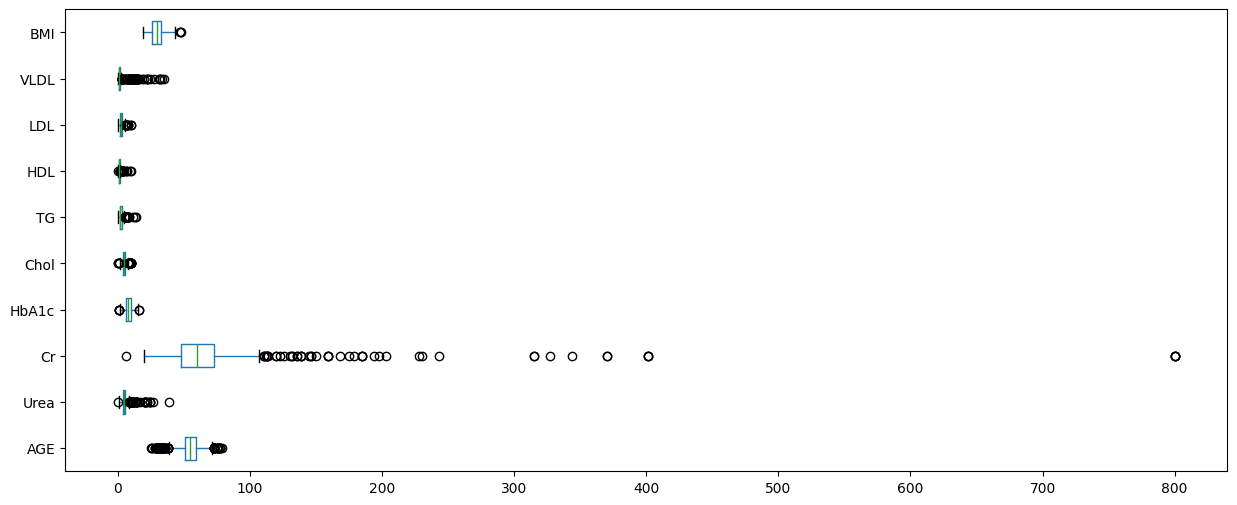

In [5]:
import matplotlib.pyplot as plt

df.boxplot(numerical_columns, vert=False, grid=False, figsize=(15, 6))
plt.show()

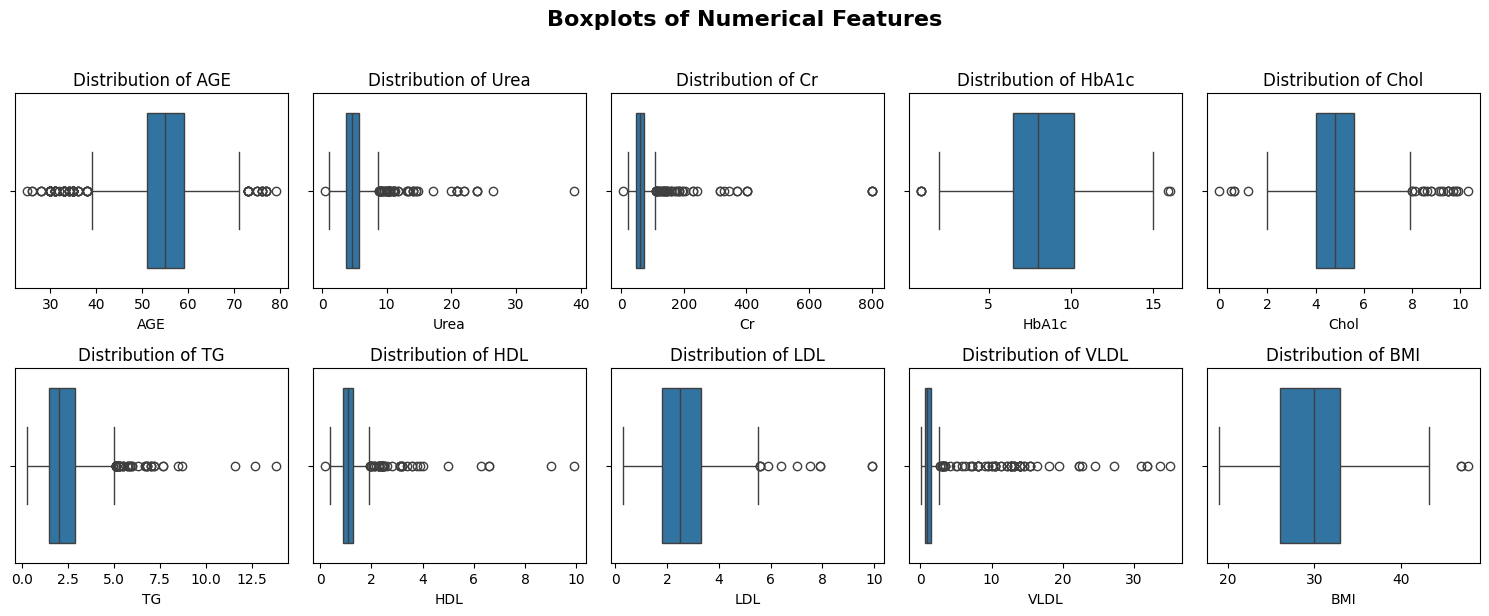

In [6]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
axes = axes.flatten()

for col, axis in zip(numerical_columns, axes):
    sns.boxplot(data=df, x=col, ax=axis)
    axis.set_title(f'Distribution of {col}')

plt.suptitle('Boxplots of Numerical Features', fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()

- From these box plots, we can clearly see that there are significant outliers in our dataset, which need to be addressed before building an ML model.

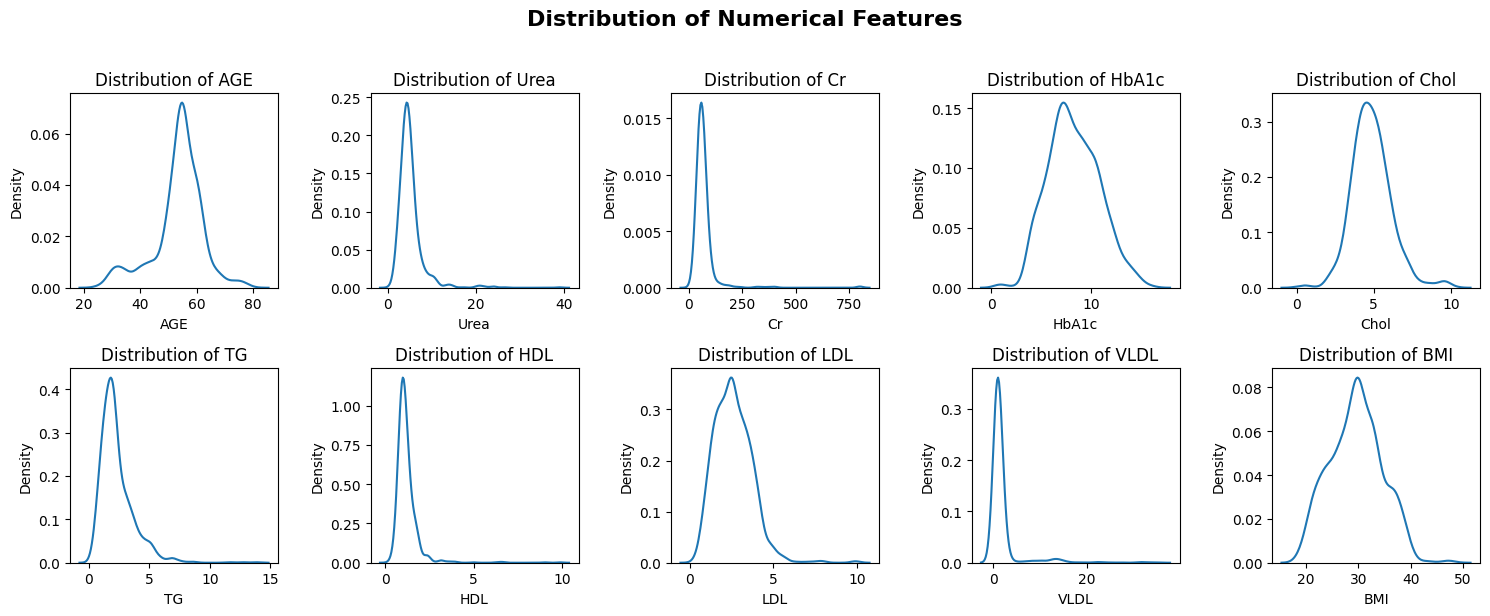

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
axes = axes.flatten()

for col, axis in zip(numerical_columns, axes):
    sns.kdeplot(data=df, x=col, ax=axis)
    axis.set_title(f'Distribution of {col}')

plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()

In [8]:
df[numerical_columns].skew()

,0
AGE,-0.782175
Urea,4.282932
Cr,8.487166
HbA1c,0.225756
Chol,0.614649
TG,2.309140
HDL,6.308517
LDL,1.125666
VLDL,5.371359
BMI,0.124338


- Most features exhibit positive skew, with **AGE** showing mild negative skew; **BMI** and **HbA1c** are approximately normally distributed, while other features show significant positive skew.

## Data Pre-Processing of Diabetes Dataset

#### 1. Data Cleaning:

##### 1.1 Renaming Columns:

In [9]:
df.rename(columns={'ID': 'Visit_ID', 'No_Pation': 'Patient_ID'}, inplace=True)

##### 1.2 Checking Unique Values in Categorical Columns:

In [10]:
categorical_columns = df.select_dtypes(include='O').columns

for i in categorical_columns:
    print(f'Unique Values of {i}: {df[i].unique()}')

Unique Values of Gender: ['F' 'M' nan 'f']
Unique Values of CLASS: ['N' 'N ' 'P' 'Y' 'Y ']


- The dataset contains `NaN` values as well as inconsistent entries.
- **Gender**: Inconsistent representation of Female (`'F'` vs. `'f'`).
- **CLASS**: Trailing spaces in `'N '` and `'Y '`.


In [11]:
df['Gender'] = df['Gender'].replace({'f' : 'F'})

- Standardized the **Gender** attribute by replacing lowercase `'f'` with uppercase `'F'` using the `replace` method.

In [12]:
df['CLASS'] = df['CLASS'].str.strip()

- Corrected the **CLASS** attribute by removing trailing spaces (`'N '` and `'Y '`) using the `strip()` method.

In [13]:
for i in categorical_columns:
    print(f'Unique Values of {i}: {df[i].unique()}')

Unique Values of Gender: ['F' 'M' nan]
Unique Values of CLASS: ['N' 'P' 'Y']


- **Gender** and **CLASS** columns are now standardized.

##### 1.3 Statistical Summary of Numerical Columns:

In [14]:
df.drop(columns=["Visit_ID", "Patient_ID"]).describe().astype(int)

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1008,1008,1007,1006,1007,1007,1008,1007,1008,1009
mean,53,5,68,8,4,2,1,2,1,29
std,8,2,59,2,1,1,0,1,3,4
min,25,0,6,0,0,0,0,0,0,19
25%,51,3,48,6,4,1,0,1,0,26
50%,55,4,60,8,4,2,1,2,0,30
75%,59,5,73,10,5,2,1,3,1,33
max,79,38,800,16,10,13,9,9,35,47


##### 1.4 Identifying Missing (Null) Values:

In [15]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

,0
Gender,3
AGE,1
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1
LDL,2
VLDL,1


##### 1.6 Imputing Missing Values:

In [16]:
#Mode imputation for NaN values in Gender Attribute
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# From the boxplot, presence of outliers and high skewness in the numerical columns
# replacing the NaN with Median() will be the effective option.
for i in df.columns[3:-1]:
    df[i] = df[i].fillna(df[i].median())

# Fill missing values in 'Gender' with the most common value (mode)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Fill missing values in 'BMI' and 'HbA1c' with their mean
df[['BMI', 'HbA1c']] = df[['BMI', 'HbA1c']].fillna(df[['BMI', 'HbA1c']].mean())

# Fill missing values in other numerical columns with their median due to presence of outliers and skewness
median_cols = [col for col in numerical_columns if col not in ['BMI', 'HbA1c']]
df[median_cols] = df[median_cols].fillna(df[median_cols].median())

In [17]:
null_counts = df.isnull().sum()
if null_counts[null_counts > 0].empty:
    print('There are no missing values in our dataset after data cleaning.')
else:
    print('Missing values found in the following columns:')
    print(null_counts[null_counts > 0])

There are no missing values in our dataset after data cleaning.


##### 1.7 Handling Outliers:

##### a. Retaining Outliers:
    - Retain outliers in the AGE, HbA1c, and BMI columns
    - In healthcare datasets, outliers often represent extreme but real cases that are crucial for analysis, especially for 'identifying high-risk patients', 'understanding population diversity', and 'making informed medical decisions'.
    - Removing these outliers could result in a loss of valuable insights, particularly when dealing with vulnerable or unique patient groups.
    - AGE: Outliers (e.g., very young or elderly) often have distinct health characteristics, essential for comprehensive analysis.
    - HbA1c: Extreme values can indicate severe or poorly controlled diabetes, which is critical for understanding risk profiles.
    - BMI: High or low values represent risks for obesity or malnutrition, both of which are linked to significant health outcomes.

##### b. Filtering Outliers:
- The boxplot shows that there are only a few datapoints significantly higher than the rest in the **Cr** and **Urea** attributes.
- To remove these outliers, the `quartile()` method can be used.

In [18]:
cr_threshold = df['Cr'].quantile(0.995)
cr_threshold

401.0

In [19]:
urea_threshold = df['Urea'].quantile(0.999)
urea_threshold

26.38080000000018

In [20]:
# check the outliers
df[ df['Cr'] > cr_threshold ]

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
844,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
858,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [21]:
df[ df['Urea'] > urea_threshold ]

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
882,46,9963,M,51.0,38.9,58.0,6.8,5.9,2.6,1.4,3.4,1.2,33.0,Y
890,55,2345,M,55.0,26.4,228.0,7.1,4.1,1.9,1.3,2.0,0.9,27.0,Y


In [22]:
# Filter outliers in Creatinine Ratio (Cr) and Urea using specified percentiles
df = df[df['Cr'] <= cr_threshold]
df = df[df['Urea'] <= urea_threshold]

##### c. Removing Extreme Outliers:

In [23]:
df.columns[-7:-2]

Index(['Chol', 'TG', 'HDL', 'LDL', 'VLDL'], dtype='object')

In [24]:
for col in df.columns[-7:-2]:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print('Outliers Removed!')

Outliers Removed!


##### 1.8 Handling Duplicates:

In [25]:
df.duplicated().sum()

7

In [26]:
df[df.duplicated()]

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
999,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1000,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1003,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,195,4543,F,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N
1008,62,46059,M,55.0,7.0,56.0,9.1,3.7,1.9,0.7,2.3,0.9,27.0,Y


In [27]:
df.drop_duplicates(inplace=True)

if not df.duplicated().any():
    print(f'Duplicates Droped!')

Duplicates Droped!


- From the below we can conclude that, now the dataset is perfectly cleaned, free from extreme values, `NaN` and duplicate (or) redundant data.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 1 to 1004
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Visit_ID    810 non-null    int64  
 1   Patient_ID  810 non-null    int64  
 2   Gender      810 non-null    object 
 3   AGE         810 non-null    float64
 4   Urea        810 non-null    float64
 5   Cr          810 non-null    float64
 6   HbA1c       810 non-null    float64
 7   Chol        810 non-null    float64
 8   TG          810 non-null    float64
 9   HDL         810 non-null    float64
 10  LDL         810 non-null    float64
 11  VLDL        810 non-null    float64
 12  BMI         810 non-null    float64
 13  CLASS       810 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 94.9+ KB


In [29]:
# write to csv
df.to_csv('diabetes_clean.csv', index=False)

#### Distribution of Categorical Columns:

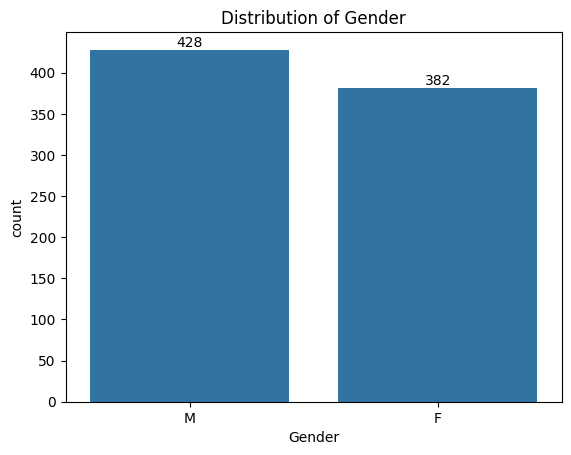

In [30]:
ax = sns.countplot(x='Gender', data=df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Gender')
plt.show()

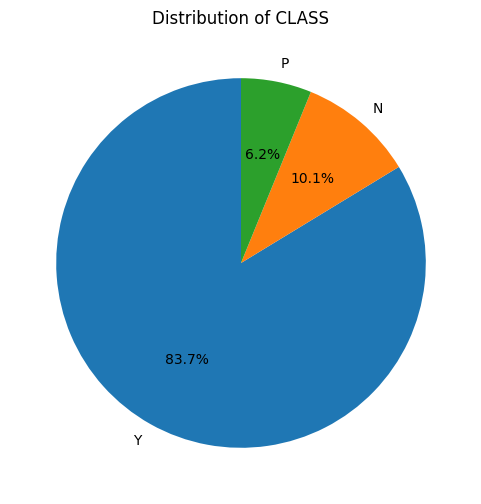

In [31]:
df['CLASS'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.ylabel('')
plt.title('Distribution of CLASS')
plt.show()

#### Relationships between the Numerical Features

This pairplot visualizes the relationships between the selected numerical features: **AGE**, **BMI**, **HbA1c**, **Urea**, **Chol**, and **TG**, with the data points colored according to the **CLASS** variable. This helps in identifying patterns and relationships between the features and their distribution across different classes - diabetic, non-diabetic, and pre-diabetic.

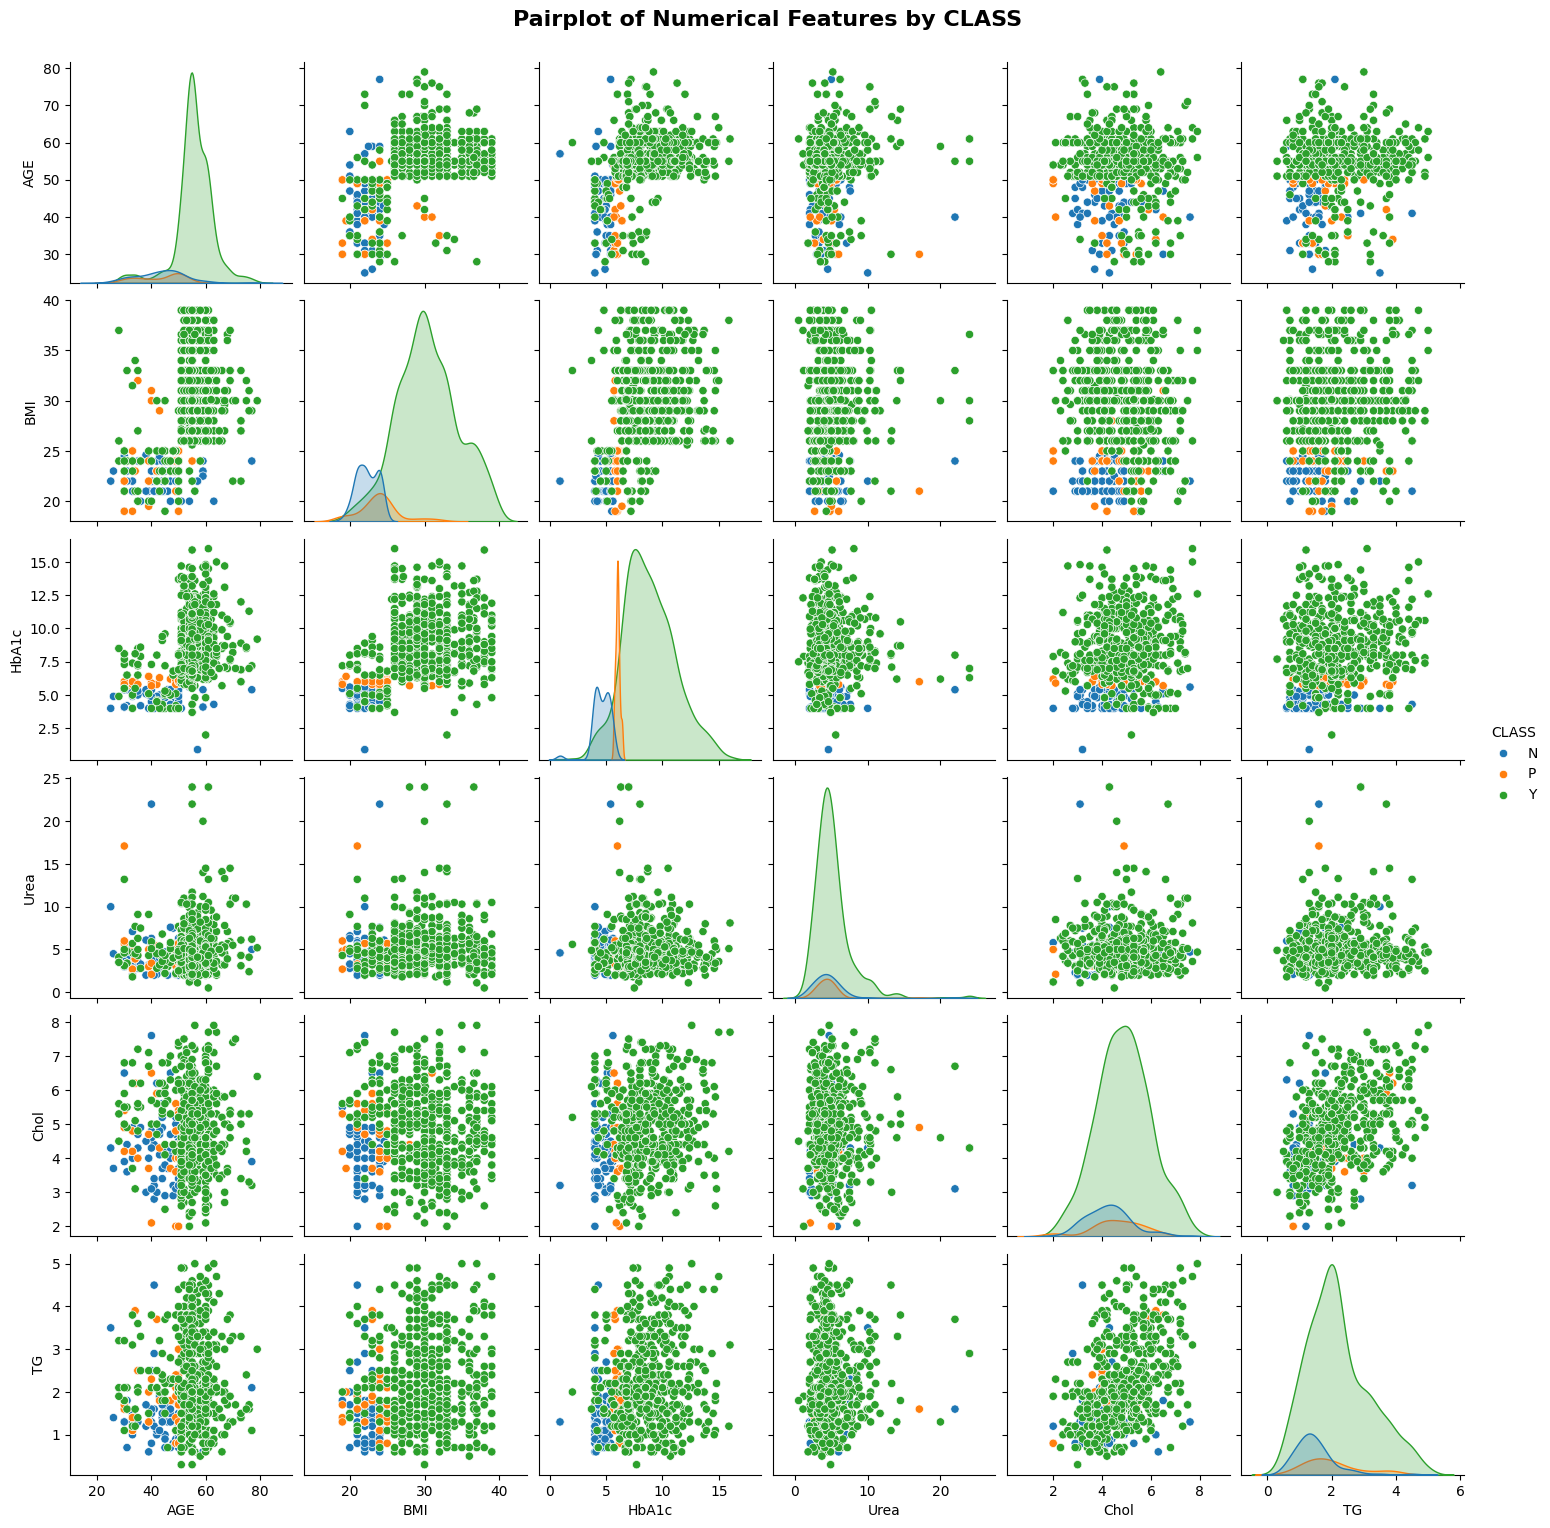

In [32]:
sns.pairplot(data=df, vars=['AGE', 'BMI', 'HbA1c', 'Urea', 'Chol', 'TG'], hue='CLASS')
plt.suptitle('Pairplot of Numerical Features by CLASS', fontsize=16, y=1.02, fontweight='bold')
plt.show()

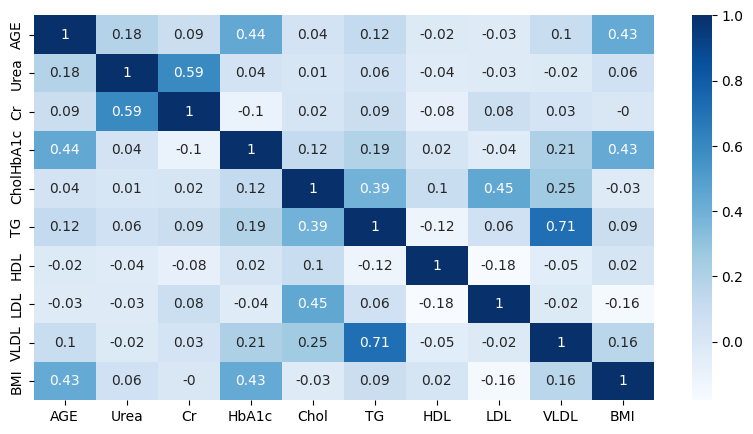

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_columns].corr(method='spearman').round(2), annot=True, cmap='Blues')
plt.show()

In [34]:
df[numerical_columns].corr(method='spearman').round(2)

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
AGE,1.00,0.18,0.09,0.44,0.04,0.12,-0.02,-0.03,0.10,0.43
Urea,0.18,1.00,0.59,0.04,0.01,0.06,-0.04,-0.03,-0.02,0.06
Cr,0.09,0.59,1.00,-0.10,0.02,0.09,-0.08,0.08,0.03,-0.00
HbA1c,0.44,0.04,-0.10,1.00,0.12,0.19,0.02,-0.04,0.21,0.43
Chol,0.04,0.01,0.02,0.12,1.00,0.39,0.10,0.45,0.25,-0.03
TG,0.12,0.06,0.09,0.19,0.39,1.00,-0.12,0.06,0.71,0.09
HDL,-0.02,-0.04,-0.08,0.02,0.10,-0.12,1.00,-0.18,-0.05,0.02
LDL,-0.03,-0.03,0.08,-0.04,0.45,0.06,-0.18,1.00,-0.02,-0.16
VLDL,0.10,-0.02,0.03,0.21,0.25,0.71,-0.05,-0.02,1.00,0.16
BMI,0.43,0.06,-0.00,0.43,-0.03,0.09,0.02,-0.16,0.16,1.00


- **Age vs. BMI**: Moderate positive correlation, indicating some relationship between age and BMI.
- **HbA1c vs. BMI**: Moderate positive correlation, showing a link between HbA1c and BMI.
- **TG vs. VLDL**: Strong positive correlation, confirming a strong relationship between TG and VLDL.
- **Other features**: Most features show weak or no significant correlations.

#### 2. Data Transformation:

##### 2.1 Feature Engineering:

In [35]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to Gender
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Gender'].unique()

array([1, 0])

In [37]:
df.head(3)

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,735,34221,1,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
4,504,34223,1,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634,34224,0,45.0,2.3,24.0,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N


##### 2.2 Feature Scaling:

- Medical data often contains outliers. Standardization is less affected by outliers compared to normalization.
- For medical data, keeping the center and spread of the original distribution can be important for interpretation. Standardization maintains this information better.

In [38]:
cols_to_scale = df.columns[3:-1]
cols_to_scale

Index(['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL',
       'BMI'],
      dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]).round(3)
df.head()

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,735,34221,1,-3.240,-0.210,-0.074,-1.311,-0.994,-0.747,-0.037,-0.496,-0.893,-1.308,N
4,504,34223,1,-2.422,0.789,-0.517,-1.311,0.089,-1.160,-0.988,-0.597,-1.346,-1.731,N
5,634,34224,0,-1.019,-1.055,-1.126,-1.669,-1.716,-1.160,-0.354,-1.102,-1.346,-1.731,N
6,721,34225,0,-0.435,-1.171,-0.406,-1.669,-1.084,-0.851,-0.671,-0.496,-0.893,-1.097,N
7,421,34227,1,-0.668,-0.133,-0.489,-1.669,-1.716,-1.367,-0.671,-1.001,-1.346,-1.097,N


## Model Building

##### Feature Selection

In [40]:
X = df.drop(columns=['Visit_ID', 'Patient_ID', 'CLASS'])     # Features
y = df['CLASS']     # Target variable

##### Splitting the dataset into training and testing sets

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

##### Resampling Data for Imbalanced Dataset

In [42]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [43]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

##### Model Fitting & Prediction

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Fit models, predict and print accuracy and F1-score
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # weighted F1-score to handle class imbalance
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")


Logistic Regression Metrics:
Accuracy: 0.8827
F1-score: 0.8939

Random Forest Metrics:
Accuracy: 0.9877
F1-score: 0.9878

KNN Metrics:
Accuracy: 0.8704
F1-score: 0.8840

SVM Metrics:
Accuracy: 0.9198
F1-score: 0.9246


Based on the evaluation metrics:
- **Random Forest** is the top performer with the highest **accuracy** (98.15%) and **F1-score** (98.16%).
- For a balance of performance and interpretability, **SVM** is a strong choice with an accuracy of 91.98% and an F1-score of 92.46%.
- **Logistic Regression**, while simpler and more interpretable, offers lower performance (Accuracy: 88.27%, F1-score: 89.39%).

Therefore, **Random Forest** is recommended for the best performance.


Confusion Matrix:



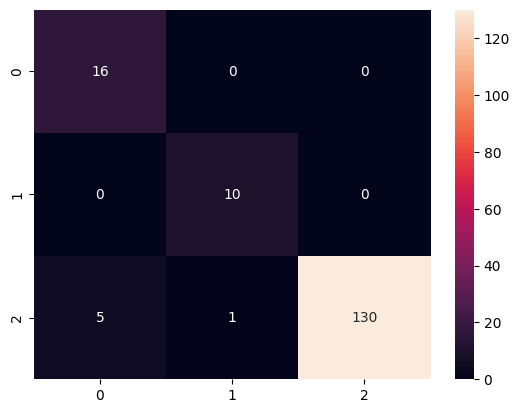

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = RandomForestClassifier(max_depth=4)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n")
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [46]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           N       0.76      1.00      0.86        16
           P       0.91      1.00      0.95        10
           Y       1.00      0.96      0.98       136

    accuracy                           0.96       162
   macro avg       0.89      0.99      0.93       162
weighted avg       0.97      0.96      0.96       162

